In [103]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold

# Задание 1

In [104]:
df = pd.DataFrame(np.loadtxt('X_train.txt'))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


# Задание 2

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


### Задание 2a

In [106]:
df.shape[1]

561

### Задание 2b

In [107]:
df.isna().sum().sum()

0

### Задание 2c

In [108]:
df.std().min() > 0

True

# Задание 3

### Задание 3a

In [109]:
var = VarianceThreshold(threshold=np.percentile(df.var(), 10))
df_var = var.fit_transform(df)
df_var.shape

(7352, 504)

### Задание 3b

In [110]:
df_scaled = StandardScaler().fit_transform(df_var)

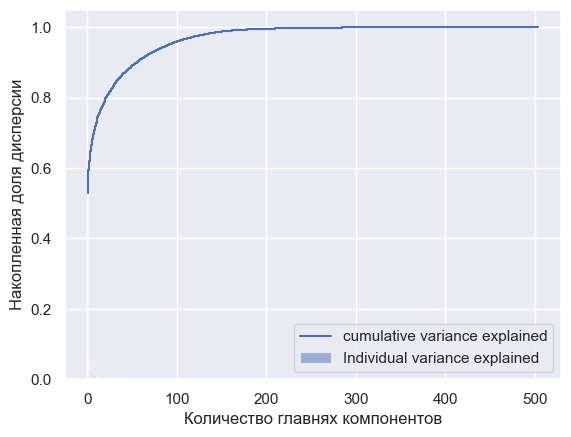

In [111]:
pca = PCA()
pca.fit(df_scaled)
var_exp=pca.explained_variance_ratio_
var_exp_cum=np.cumsum(var_exp)

plt.bar(range(1, 505), var_exp, alpha=0.5,
        align='center', label='Individual variance explained')
plt.step(range(1, 505), var_exp_cum, where='mid',
         label='cumulative variance explained')
plt.xlabel('Количество главнях компонентов')
plt.ylabel('Накопленная доля дисперсии')
plt.legend(loc='best')
plt.show()

In [112]:
min_components = np.searchsorted(var_exp_cum, 0.9)
print(min_components)

55


In [113]:
pca = PCA(n_components=2)
df_pca_two = pca.fit_transform(df_scaled)

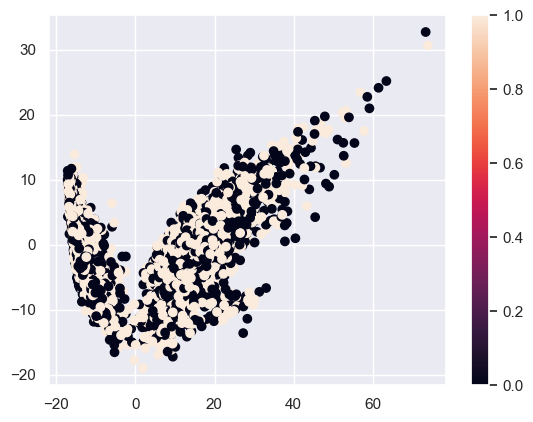

In [114]:
map_color = np.random.uniform(0, 1, size=7352) > 0.5
plt.scatter(df_pca_two[:, 0], df_pca_two[:, 1], c=map_color)
plt.colorbar()
plt.show()

# Задание 4

### Задание 4a

  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 11%|█         | 1/9 [00:00<00:01,  5.84it/s]C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 22%|██▏       | 2/9 [00:00<00:01,  4.49it/s]C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py

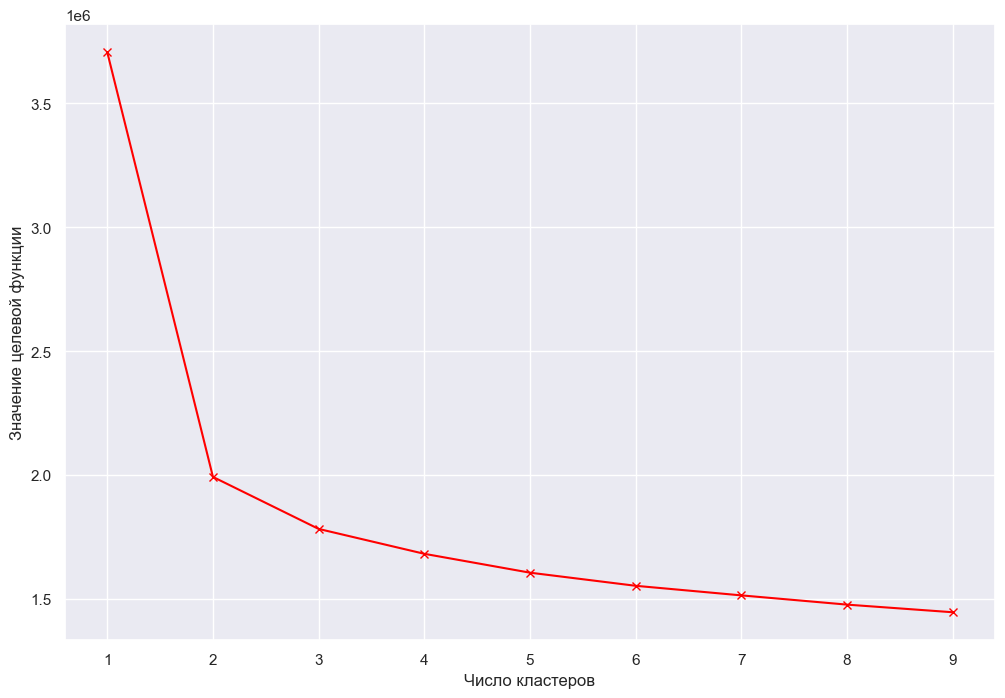

In [115]:
distortion = []
K = range(1, 10)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=45)
    model.fit(df_scaled)
    distortion.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, c='red', marker='x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

### Задание 4b

#### Выберу оптимальное количество кластеров: 2. Так как значение целевой функции при числе кластеров 2, является хорошим и составляет значение 2, дальше уже с увеличением кластеров, значение целевой функции не такая оптимальная.

### Задание 4c

In [116]:
pca = PCA(n_components=2)
df_pca_two_again = pca.fit_transform(df_scaled)
k_means = KMeans(n_clusters=2, random_state=45)
k_pred = k_means.fit_predict(df_pca_two_again)

C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


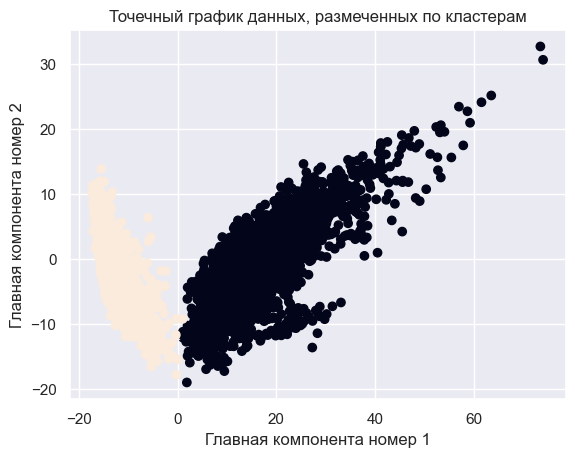

In [117]:
plt.scatter(df_pca_two_again[:, 0], df_pca_two_again[:, 1], c=k_pred)
plt.xlabel('Главная компонента номер 1')
plt.ylabel('Главная компонента номер 2')
plt.title('Точечный график данных, размеченных по кластерам')
plt.show()

# Задание 5

### Задание 5a

In [118]:
y_train = np.loadtxt('y_train.txt', dtype=int)
activity_labels = np.loadtxt('activity_labels.txt', dtype=str)

In [119]:
y_train

array([5, 5, 5, ..., 2, 2, 2])

In [120]:
activity_labels

array([['1', 'WALKING'],
       ['2', 'WALKING_UPSTAIRS'],
       ['3', 'WALKING_DOWNSTAIRS'],
       ['4', 'SITTING'],
       ['5', 'STANDING'],
       ['6', 'LAYING']], dtype='<U18')

### Задание 5b

In [121]:
for i, label in enumerate(np.unique(y_train)):
    activ = activity_labels[i, 1]
    print(f'Label: {label}, Activ: {activ}')

Label: 1, Activ: WALKING
Label: 2, Activ: WALKING_UPSTAIRS
Label: 3, Activ: WALKING_DOWNSTAIRS
Label: 4, Activ: SITTING
Label: 5, Activ: STANDING
Label: 6, Activ: LAYING


In [122]:
data = pd.DataFrame({'labels': y_train, 'clusters': k_pred})
data.value_counts()

labels  clusters
6       1           1396
5       1           1374
4       1           1285
1       0           1226
2       0           1068
3       0            986
6       0             11
2       1              5
4       0              1
Name: count, dtype: int64

### Задание 5c

**Вывод: Потому что можно с легкостью разделить данные 6 активностей, например, на 2 кластера. Первые три активности можно отнести к первому кластеру, так как в этих активностях выполняются хоть какие-то силы для этого действия, то есть выполняются передвижение в пространстве, задействие ног для передвижения. А вот ко второму кластеру относятся оставшиеся последние три активности, в этих активностях кроме 5(STANDING), не задействуются ноги, но даже с 5 эти активности не выполняют ещё одного действия, передвижения в пространстве за счёт своих физических усилий, грубо говоря в этих активностях ничего не делается.**